In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
clusts = open('../../data/cluster_list.txt').read().split('\n')

In [3]:
annotation = pd.read_csv('../../data/outputs/final/gex_conservation_annotation.tsv', sep='\t').set_index('Unnamed: 0')

In [4]:
annotation.head()

,four_species_1to1_ortholog,putative_human_specific,level3_all,level3_primate,level1_macaque,level1_marmoset,level1_mouse,ASC_active,ChC_active,Endo_active,...,level2_mouse_L6_IT,level2_mouse_LAMP5,level2_mouse_MGC,level2_mouse_ODC,level2_mouse_OPC,level2_mouse_PVALB,level2_mouse_SNCG,level2_mouse_SST,level2_mouse_VIP,level2_mouse_VLMC
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
A1BG,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
A1CF,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
A2M,False,False,False,False,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
A2ML1,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
A3GALT2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [75]:
level_colors = {
    'x' : '#EA4E9D',
    'level0' : '#F47B4D',
    'level1' : '#FBAB41',
    'level2' : '#E1E65C',
    'level3' : '#9ED3A4',
}

In [5]:
annotation.columns

Index(['four_species_1to1_ortholog', 'putative_human_specific', 'level3_all',
       'level3_primate', 'level1_macaque', 'level1_marmoset', 'level1_mouse',
       'ASC_active', 'ChC_active', 'Endo_active', 'L2_3_IT_active',
       'L4_5_IT_active', 'L5_6_NP_active', 'L5_ET_active', 'L5_IT_active',
       'L6b_active', 'L6_CT_active', 'L6_IT_CAR3_active', 'L6_IT_active',
       'LAMP5_active', 'MGC_active', 'ODC_active', 'OPC_active',
       'PVALB_active', 'SNCG_active', 'SST_active', 'VIP_active',
       'VLMC_active', 'level2_macaque_ASC', 'level2_macaque_ChC',
       'level2_macaque_Endo', 'level2_macaque_L2_3_IT',
       'level2_macaque_L4_5_IT', 'level2_macaque_L5_6_NP',
       'level2_macaque_L5_ET', 'level2_macaque_L5_IT', 'level2_macaque_L6b',
       'level2_macaque_L6_CT', 'level2_macaque_L6_IT_CAR3',
       'level2_macaque_L6_IT', 'level2_macaque_LAMP5', 'level2_macaque_MGC',
       'level2_macaque_ODC', 'level2_macaque_OPC', 'level2_macaque_PVALB',
       'level2_macaque_SNC

In [6]:
annotation['level1_mammal'] = annotation.level1_macaque & annotation.level1_marmoset & annotation.level1_mouse
annotation['level1_primate'] = (annotation.level1_macaque & annotation.level1_marmoset) &~annotation.level1_mammal

In [58]:
new_annot = annotation[['four_species_1to1_ortholog',
                             'putative_human_specific', 'level3_all', 'level3_primate',
                             'level1_mammal', 'level1_primate'
                             ]].copy()

In [59]:
for clust in clusts:
    new_annot['level2_mammal_{}'.format(clust)] = (
                                    annotation['level2_mouse_{}'.format(clust)] &
                                    annotation['level2_marmoset_{}'.format(clust)] &
                                    annotation['level2_macaque_{}'.format(clust)]
                                    )
    new_annot['level2_primate_{}'.format(clust)] = (
                                (annotation['level2_marmoset_{}'.format(clust)] &
                                annotation['level2_macaque_{}'.format(clust)])
                                &~ new_annot['level2_mammal_{}'.format(clust)]
                                )


In [60]:
l2_mammal = new_annot['level2_mammal_{}'.format(clusts[0])]
l2_primate = new_annot['level2_primate_{}'.format(clusts[0])]
active = annotation['{}_active'.format(clusts[0])]
for clust in clusts:
    l2_mammal = l2_mammal | new_annot['level2_mammal_{}'.format(clust)]
    l2_primate = l2_primate | new_annot['level2_primate_{}'.format(clust)]
    active = active | annotation['{}_active'.format(clust)]
                        
new_annot['level2_mammal'] = l2_mammal
new_annot['level2_primate'] = l2_primate &~l2_mammal
new_annot['active'] = active

In [61]:
clust_var = pd.read_csv('../../data/for_figures/fig2_gex/max_mean_ratio.tsv', sep='\t', header=None).set_index(0)

In [62]:
clust_var.index.isin(annotation.index).sum()

19798

In [63]:
# annotated all protein coding genes, but not all protein coding genes are expressed

In [64]:
new_annot['cluster_var'] = clust_var

In [65]:
new_annot.putative_human_specific

Unnamed: 0
A1BG       False
A1CF       False
A2M        False
A2ML1      False
A3GALT2    False
           ...  
ZXDC       False
ZYG11A     False
ZYG11B     False
ZYX        False
ZZEF1      False
Name: putative_human_specific, Length: 20412, dtype: bool

# show cell type specificity at different levels

In [124]:
var_levels = [
                # new_annot.loc[new_annot.active & new_annot.putative_human_specific, 'cluster_var'].values,
                # new_annot.loc[new_annot.active, 'cluster_var'].dropna().values,
                new_annot.loc[new_annot.active & new_annot.four_species_1to1_ortholog, 'cluster_var'].dropna().values,
                new_annot.loc[new_annot.level1_mammal, 'cluster_var'].values,
                new_annot.loc[new_annot.level2_mammal, 'cluster_var'].values,
                new_annot.loc[new_annot.level3_all, 'cluster_var'].values,
                new_annot.loc[new_annot.level1_primate, 'cluster_var'].values,
                new_annot.loc[new_annot.level2_primate, 'cluster_var'].values,
                new_annot.loc[new_annot.level3_primate, 'cluster_var'].values
]          

In [125]:
cons_levels = ['x', 'level0', 'level1', 'level2', 'level3'] + ['level1', 'level2', 'level3']

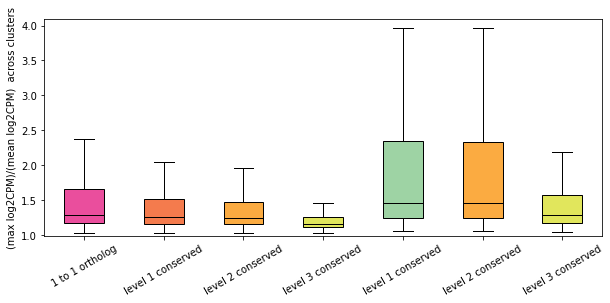

In [128]:
fig, ax = plt.subplots(figsize=(10, 4))
boxes = ax.boxplot(var_levels, showfliers=False, patch_artist=True, notch=False, medianprops=dict(color='black'))
ax.set_ylabel('(max log2CPM)/(mean log2CPM)  across clusters')
ax.set_xticks(np.arange(len(var_levels)) + 1, labels= [
                                                    '1 to 1 ortholog',
                                                    'level 1 conserved',
                                                    'level 2 conserved',
                                                    'level 3 conserved'] + 
                                                    [
                                                    'level 1 conserved',
                                                    'level 2 conserved',
                                                    'level 3 conserved'], 
          rotation =30)
plt.ylim(.98, 4.1)
for patch, level in zip(boxes['boxes'], cons_levels):
    patch.set_facecolor(level_colors[level])